# ICA and PCA applied on natural scenes

In exercise 5 'Learning with Spiking Neural Networks' you have seen how receptive field of simple cells in V1 look like. Hubel and Wiesel (1959) studied the simple cells in the V1 area of a cat. By applying various light stimuli they found that stimuli looking like bars with a specific orientation have the highest cell response. With these findings the receptive fields of simple cells could be illustrated as shown in the figure below.

A nice illustration on how simple cells respond to various light stimuli can be found on https://isle.hanover.edu/Ch04Brain/Ch04SimpleCell_evt.html. 

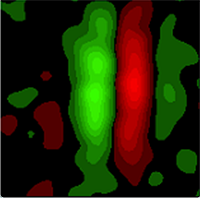

In the following tasks you will verify that Independent Component Analysis generates similar looking filters when applied on natural scenes.

Futhermore, we will also discuss the characteristic of such filters.

---



---

## Dataset of natural scenes

We provide following script 
to load the cifar10 data set from tensorflow
and to cut out 8x8 pieces from the images. 

- Please, read briefly through the script to understand how the cutouts are created.
- Convince yourself that the data set consists of natural scenes.

Feel free to change parameters of the data set.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.decomposition import FastICA, PCA
import tensorflow as tf
import scipy.signal 

# Loading natural dataset using tensorflow
(images, Y), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
# Reshaping
# reduce number of sample images to 1000
# create 8x8 cutouts
X = images[:1000,:,:,0].reshape(-1, 4, 8, 4, 8)
X = np.rollaxis(X, axis=3, start=2).reshape(-1, 8 * 8)

### Plotting example data 
(You do not need to fully understand this plotting script.)
$$$$

We apply the statistical methods only on cutouts of the images to simulate visual fields.

Those cutouts or visual field are presented here, together with the original image.


<Figure size 432x288 with 0 Axes>

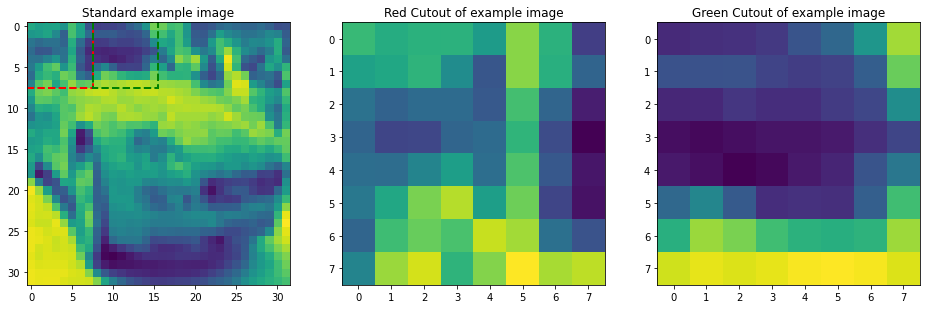

In [ ]:
# number of example image
example_num = 5
example_image = images[example_num, :, :, 0]

# plotting example image and cutouts
plt.figure()
fig, ax = plt.subplots(ncols=3, figsize=(16,10))
ax[0].set_title('Standard example image')
ax[0].imshow(example_image)

ax[1].set_title('Red Cutout of example image')
ax[1].imshow(np.reshape(X[16*example_num],[8,8]))

ax[2].set_title('Green Cutout of example image')
ax[2].imshow(np.reshape(X[16*example_num+1],[8,8]))

# Create a Rectangle patch
rect = patches.Rectangle((-0.5, -0.5), 8, 8, linewidth=2, edgecolor='r', facecolor='none', linestyle='dashed')
ax[0].add_patch(rect)
rect = patches.Rectangle((7.5, -0.5), 8, 8, linewidth=2, edgecolor='g', facecolor='none', linestyle='dashed')
ax[0].add_patch(rect)

plt.show()

---
---

## A) PCA applied on natural images 

* before applying ICA on natural images, use PCA to compute the first n=49 principal components of all cutouts
* plot all components
* describe the filters and their main features
$$$$

The number of principal components (n=49) is chosen arbitrary. A 7x7 plot grid seems to be the ideal plot structure.


In [ ]:
# TODO: perform PCA

# TODO: store filters

# plot filters
plt.figure(figsize=(16,10))
plt.suptitle('PCA filter when applied on natural scenes')
for i, f in enumerate(pca_filters):
    plt.subplot(7, 7, i + 1)
    plt.imshow(f.reshape(8, 8), cmap="gray")
    plt.axis("off")
plt.show(

### Solution

In [ ]:
# perform PCA
pca = PCA(n_components=49)
pca.fit(X)
# store filters
pca_filters = pca.components_

# plot filters
plt.figure(figsize=(16,10))
plt.suptitle('PCA filter when applied on natural scenes')
for i, f in enumerate(pca_filters):
    plt.subplot(7, 7, i + 1)
    plt.imshow(f.reshape(8, 8), cmap="gray")
    plt.axis("off")
plt.show()

### Findings

In [ ]:
print('frequency pattern')
print('not localized')
print('orthogonal')

---
---

## B) ICA applied on natural scenes

* apply ICA on the cutouts
* plot n=49 components
* compare the components with the receptive field shown on top
* describe the filters and their main features

In [ ]:
# TODO: perform ICA on natural scences cutouts

# TODO: store filters


# plot filters
plt.figure(figsize=(16,10))
plt.suptitle('ICA filter when applied on natural scenes')
for i, f in enumerate(ica_filters):
    plt.subplot(7, 7, i + 1)
    plt.imshow(f.reshape(8, 8), cmap="gray")
    plt.axis("off")
plt.show(

### Solution

In [ ]:
# perform ICA
ica = FastICA(n_components=49)
ica.fit(X)
# store filters
ica_filters = ica.components_

# plot filters
plt.figure(figsize=(16,10))
plt.suptitle('ICA filter when applied on natural scenes')
for i, f in enumerate(ica_filters):
    plt.subplot(7, 7, i + 1)
    plt.imshow(f.reshape(8, 8), cmap="gray")
    plt.axis("off")
plt.show()

### Findings


In [ ]:
print('localized')
print('non orthogonal')
print('orientated')

---
---

## C) Convolution of receptive fields

In order to get an intuition on how our brain extracts features,

* find an ICA filter most similar to the receptive field at top
* perform a convolution on the example image with this ICA filter
* describe some attributes of the filter (Which features of the image are amplified? Which features produce the highest response?)


In [ ]:
plt.figure()
plt.title('Example image')
# TODO: plot example image 
plt.figure()
plt.title('Nice ICA filter')
# TODO: ICA filter most similar to simple cell
plt.figure()
plt.title('Convolution')
# TODO: Perform convolution

### Solution

In [ ]:
plt.figure()
plt.title('Example image')
plt.imshow(example_image)
plt.figure()
plt.title('Nice ICA filter')
plt.imshow(ica_filters[2].reshape(8,8))
plt.figure()
plt.title('Convolution')
plt.imshow(scipy.signal.convolve2d(ica_filters[2].reshape(8,8), example_image))


### Findings


In [ ]:
print('orientation selective')
print('highest response to edges or bars')

---
---

## Gaussian world

To convince yourself, that our vision is optimized for natural scenes, we also apply ICA on Gaussian images. 
$$$$

### Dataset of Gaussian images
First, we generate a new data set (script provided) with the same shape as the natural scene data set.

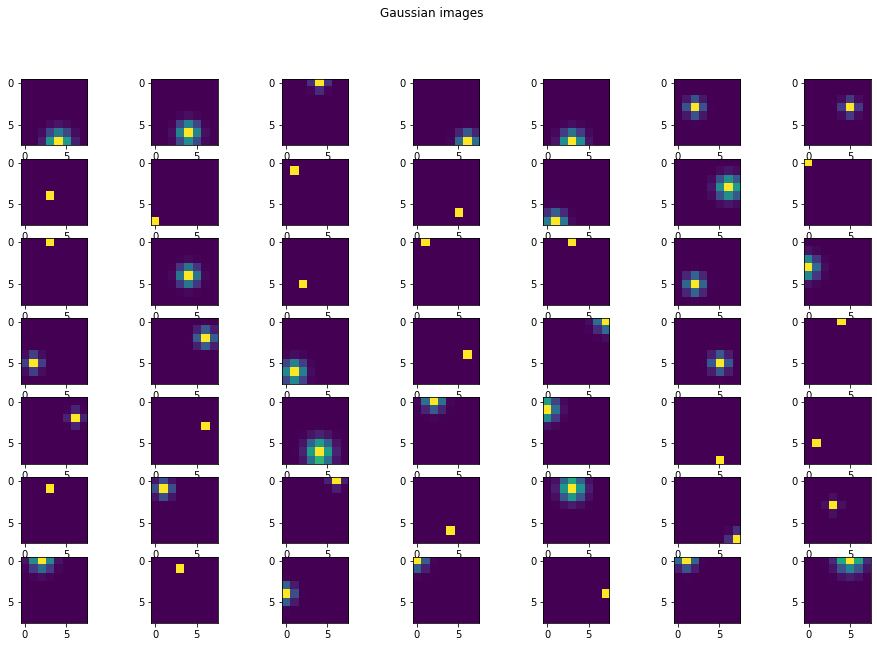

In [ ]:
from scipy import signal
import scipy.ndimage.filters as filters

def gaussian_image(mean, sigma, size):
    """Returns a 2D Gaussian kernel array."""

    # create nxn zeros
    inp = np.zeros((size[0], size[1]))
    # set element at the middle to one, a dirac delta
    inp[mean[0], mean[1]] = 1
    # gaussian-smooth the dirac, resulting in a gaussian filter mask
    return filters.gaussian_filter(inp, sigma)

N = 100
X_gaussian = np.zeros([N,8,8])

for i in range(N):
  mean = np.random.uniform(0,8,size=2).astype('int')
  sigma = np.random.uniform(0,1)
  X_gaussian[i,:,:] = gaussian_image(mean, sigma, [8,8])

fig, ax = plt.subplots(ncols=7, nrows=7,figsize=(16,10))
plt.suptitle('Gaussian images')
for i in range(7):
  for j in range(7):
    ax[i,j].imshow(X_gaussian[7*i+j])

X_gaussian = X_gaussian.reshape(-1,8*8)

## D) ICA on Gaussian images

* apply ICA on Gaussian images
* plot n=49 components
* compare the components with the receptive field shown on top
* describe the filters and their main feature

In [ ]:
# TODO: perform ICA on Gaussian images

# TODO: store filters

# plot filters
plt.figure(figsize=(16,10))
plt.suptitle('ICA filter when applied on natural scenes')
for i, f in enumerate(gaussian_filters):
    plt.subplot(7, 7, i + 1)
    plt.imshow(f.reshape(8, 8), cmap="gray")
    plt.axis("off")
plt.show()

### Solution

In [ ]:
# perform ICA
ica = FastICA(n_components=49)
ica.fit(X_gaussian)
# store filters
gaussian_filters = ica.components_

# plot filters
plt.figure(figsize=(16,10))
plt.suptitle('ICA filter when applied on natural scenes')
for i, f in enumerate(gaussian_filters):
    plt.subplot(7, 7, i + 1)
    plt.imshow(f.reshape(8, 8), cmap="gray")
    plt.axis("off")
plt.show()

### Findings

In [ ]:
print('localized')
print('not orientated')

# Characteristics of receptive fields of simple cells and filters from ICA

* respond best to elongated bars or edges
* orientation selective
* localized

In contrast to principal components from PCA

* frequency pattern
* no localized support

ICA filters applied on Gaussian images are

* localized
* but not orientation selective

